In [10]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
# for types hints
from typing import Tuple, Callable, List, Optional
from tensorflow import Tensor

Synthetic Data

In [ ]:
# 4 input values, each Gaussian distributed with 0 mean and 1 stdev
# 1 output value, distance from the origin, AKA L2-norm
# 1000 instances for training, 1000 for testing

In [3]:
def create_synthetic_data(n_train=1000, n_test=1000, n_features=4):
    """
    Create a synthetic regression dataset.

    :param n_train: Number of training instances.
    :param n_test: Number of testing instances.
    :param n_features: Number of input features.
    :return: X_train, y_train, X_test, y_test
    """

    # Create training data
    X_train = np.random.normal(loc=0, scale=1, size=(n_train, n_features))
    # printing the 5 first elements in X_train
    print(X_train[:5])
    y_train = np.linalg.norm(X_train, axis=1)  # Compute the L2-norm
    # printing the 5 first elements in y_train
    print(y_train[:5])

    # Create testing data
    X_test = np.random.normal(loc=0, scale=1, size=(n_test, n_features))
    # printing the 5 first elements in X_test
    print(X_test[:5])
    y_test = np.linalg.norm(X_test, axis=1)  # Compute the L2-norm
    # printing the 5 first elements in y_test
    print(y_test[:5])

    return X_train, y_train, X_test, y_test

In [4]:
# Generate the synthetic data
X_train, y_train, X_test, y_test = create_synthetic_data()

# Print shapes to verify
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

[[ 1.28672649  0.93149066 -0.74884633  2.02027456]
 [-0.08386449 -0.64868127  0.88853228  0.95148622]
 [ 0.97176136 -0.89831977 -0.4159597  -0.05499344]
 [-1.12954275  0.90327466 -0.82624635  0.71239988]
 [ 1.49028671 -0.52092219 -2.24720827 -0.58308461]]
[2.67686758 1.456927   1.38828863 1.81162042 2.80753398]
[[ 0.44320081 -1.63358233 -0.35637945  0.37804522]
 [-0.02313322 -0.35345091 -1.89652751 -0.98406304]
 [-0.0713133   1.33469435  0.08153144 -1.76624257]
 [ 0.05114043  0.60373798  1.43008909 -0.26314417]
 [-0.65929228  0.4082989   1.20885392 -1.46153851]]
[1.77057694 2.16579301 2.2164735  1.57528237 2.04909661]
X_train shape: (1000, 4)
y_train shape: (1000,)
X_test shape: (1000, 4)
y_test shape: (1000,)


Model Building

In [ ]:
# NN for representation learning:
# 4 input nodes
# 1 or more hidden layers
# the last hidden layer has 2 nodes (representation layer Z)
# plot the instances in the 2D feature/representation space of Z 
# use different colors for different target values (can be in groups, each group with a different color) similar to the RankSim pictures
# training and test sets in different plots.
# expecting the instances to be in a semi-circle
# for prediction, add output layer of 1 node.


In [5]:
def create_model(hiddens: List[int]) -> tf.keras.Model:
    """
    Create a neural network model using the Keras functional API based on the provided architecture.
    
    :param hiddens: List of integers representing the number of nodes in each hidden layer.
    :return: The uncompiled model.
    """
    inputs = tf.keras.Input(shape=(4,))
    x = inputs
    # Define hidden layers according to architecture
    for nodes in hiddens:
        x = tf.keras.layers.Dense(nodes, activation='relu')(x)
    # Define the representation layer
    repr_layer = tf.keras.layers.Dense(2, activation='relu', name='repr_layer')(x)
    # Define the output layer
    outputs = tf.keras.layers.Dense(1)(repr_layer)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model


In [11]:
def plot_feature_space(model: tf.keras.Model, data: np.ndarray, labels: np.ndarray, groups: Optional[List[int]] = None):
    """
    Plot the instances in the 2D feature space of the representation layer (Z).

    :param model: Trained neural network model.
    :param data: Input data, shape of [num_instances, num_features].
    :param labels: Corresponding labels for the data.
    :param groups: Optional grouping for labels to define color assignment.
    """
    # Extract the representation layer from the model
    repr_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('repr_layer').output)

    # Predict the representation for the input data
    repr_space = repr_layer_model.predict(data)

    # If groups are defined, categorize labels into groups
    if groups:
        group_labels = [np.digitize(label, groups) for label in labels]
    else:
        group_labels = labels

    # Create a scatter plot for the representation space
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(repr_space[:, 0], repr_space[:, 1], c=group_labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('2D Feature Space of Representation Layer')
    plt.show()

Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 2.9266
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 1.6550
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7253
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.3583
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1997
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.1410
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.1165
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0995
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0853
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0730


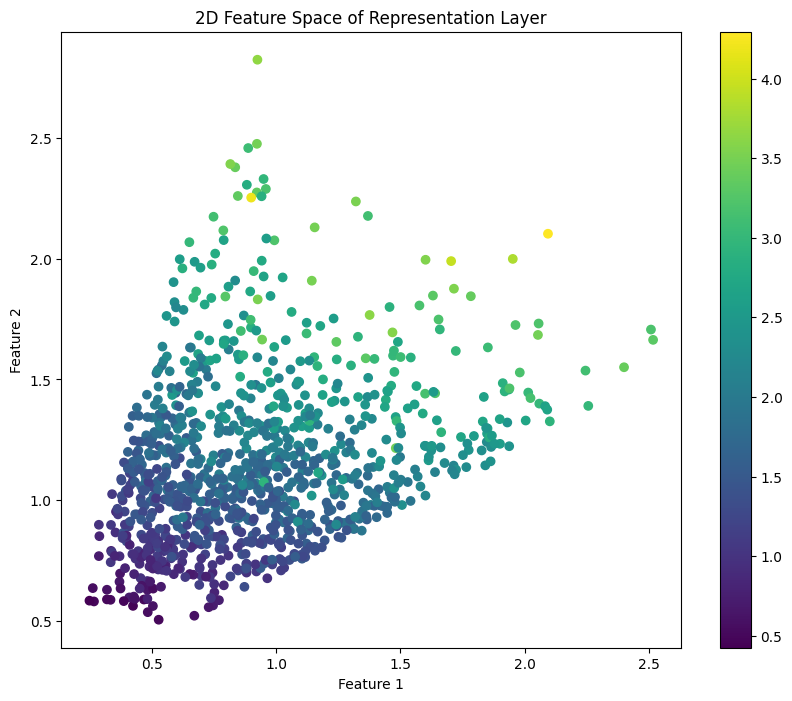

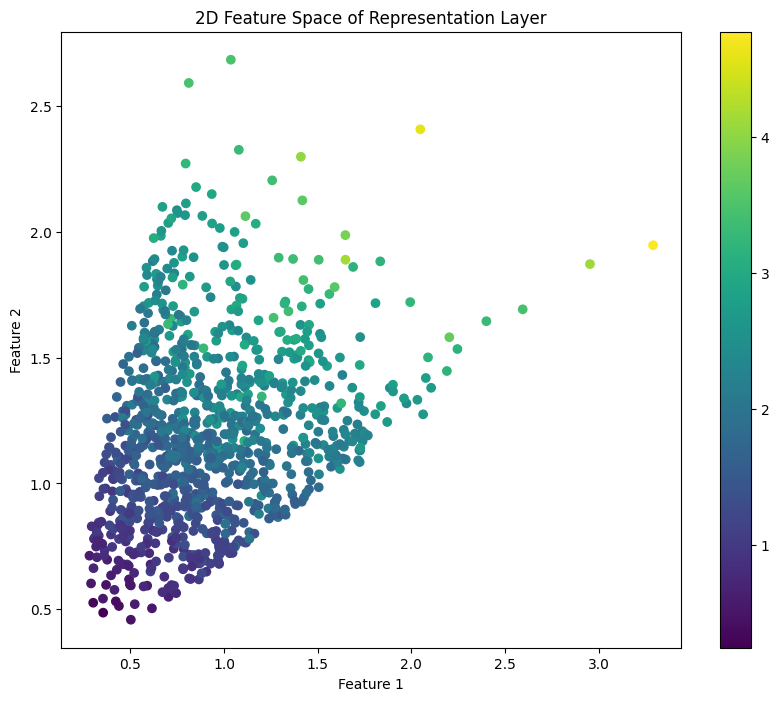

In [15]:
# Create and train the model
model = create_model([16, 16])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Plot the 2D feature space
plot_feature_space(model, X_train, y_train)
plot_feature_space(model, X_test, y_test)


Test of First Idea improving on ranksim